# Машинное обучение 
## Семинар 1

### Часть 1. Основы numpy

In [ ]:
import numpy as np

#### from python list to np array

In [ ]:
lst = [1, 2, 3]
a = np.array(lst) # 1d-array
b = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) # 2d-array 

#### Создание массива np.array

In [ ]:
np.zeros(10) # array of zeros
np.ones(10) # array of ones
np.arange(0, 10) # same as range
np.linspace(0, 10, 10) # array of 10 evenly spaced values from 0 to 10
np.eye(10) # identity matrix
np.random.rand(10) # array of 10 random elements sampled from uniform distribution on [0, 1]

#### Характеристики np.array

In [ ]:
b.shape # shape of matrix

In [ ]:
len(b) # b.shape[0], len of first dimension

#### Операции над массивом. Все операции выполняются поэлементно.

In [ ]:
a = np.arange(5)
b = 2 * np.ones(5)

In [ ]:
a, b

In [ ]:
a + b

In [ ]:
a - b

In [ ]:
a * b

In [ ]:
a / b

In [ ]:
a + 2

In [ ]:
np.exp(a)

In [ ]:
np.log(a + 1)

In [ ]:
np.sin(a)

In [ ]:
np.sqrt(a)

Аналогично с логическими операциями

In [ ]:
a == 2

In [ ]:
a == b

#### Агрегирующие функции

In [ ]:
a.max() # or np.max(a)

In [ ]:
a.sum()
a.min()
a.mean()
a.std() # a.std(ddf=1) for unbiased estimation

Операции можно выполнять вдоль определенной размерности

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a

In [ ]:
a.sum()

In [ ]:
np.sum(a)

In [ ]:
a.sum(axis=1)

In [ ]:
a.min(axis=0)

In [ ]:
np.median(a, axis=0)

#### Индексация и слайсинг

In [ ]:
a = np.arange(1, 4)
b = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

Индексация

In [ ]:
b

In [ ]:
b[1, 2]

In [ ]:
b[1][2]

Слайсинг

In [ ]:
a

In [ ]:
a[0:2] # from 0th inclusive to 2nd non-inclusive

In [ ]:
b[1, 1:10] # slices can go beyond len of the dimension

Булевые массивы могут быть использованы для индексации

In [ ]:
b < 6

In [ ]:
b

In [ ]:
b[b < 6]

#### Массивы numpy.array являются изменяемыми. Если нужно сделать временное изменение, необходимо создать копию.

In [ ]:
c = b

In [ ]:
b

In [ ]:
c[0] = 10

In [ ]:
c[0, 0] = 10

In [ ]:
b

In [ ]:
b = a.copy()
b = np.copy(a)

#### Манипуляции с массивами numpy.array

In [ ]:
b = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [ ]:
b.transpose() # or b.T, matrix transposition. doesn't work on 1d arrays

In [ ]:
b.ravel() # flatten array (make it 1d) | or b.flatten()

In [ ]:
np.arange(10).reshape(2, 5) # changing shape of array

In [ ]:
np.arange(10).reshape(2, -1) # -1 can be used as a placeholder for one (and only one) dimension

In [ ]:
a = np.arange(4)

In [ ]:
np.append(a, 6) # add element to the end and RETURN a copy of changed array
np.insert(a, 0, -1) # insert on certain position
np.delete(a, 0) # remove element from a position

In [ ]:
a = np.arange(10).reshape(2, 5)
b = -np.arange(10).reshape(2, 5)

In [ ]:
np.hstack((a, b)) # stack array horizontaly, can stack any amount of arrays

In [ ]:
np.vstack((a, b)) # stack array vertically

In [ ]:
np.concatenate((a, b), axis=0) # stack arrays along particular axis

#### Бродкастинг

Операции в NumPy часто выполняются над парами массивов поэлементно. В простом случае размеры этих двух массивов совпадают.

In [ ]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
a * b

Бродкастинг в NumPy ослабляет данное ограничение в случаях, когда размеры массивов удовлетворяют определенным свойствам. Наиболее простой пример бродкастинга - операция между массивом и скаляром.

In [ ]:
a = np.array([1.0, 2.0, 3.0])
с = 2.0
a * с

При выполнении операции над двумя массивами, NumPy сравнивает их размеры поэлементно. Размерности массивов считаются совместимыми, если выполняется одно из:
  1. Размерности совпадают
  2. Одна из размерностей равна 1
  3. Одна из размерностей отсутствует

In [ ]:
a = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]])
b = np.array([1.0, 2.0, 3.0])
a * b

In [ ]:
a.shape

In [ ]:
b.shape

In [ ]:
a = np.array([[1.0, 2.0, 3.0, -1.], [4.0, 5.0, 6.0, -1. ], [7.0, 8.0, 9.0, -1.]])
b = np.array([1.0, 2.0, 3.0, 4])
a * b

In [ ]:
a.shape, b.shape

## Часть 2
### Метрические методы классификации и регрессии

#### Библиотеки

In [ ]:
# !pip install scikit-learn==1.2.2
# !pip install mlxtend==0.23.2

In [1]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
import torch

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

#### Датасет

In [2]:
X, Y = make_classification(n_samples=150, n_features=2,
                           n_informative=2, n_classes=3,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=50,
                                                    random_state=0)

#### Метод ближайшего соседа

In [3]:
model = KNeighborsClassifier(n_neighbors=1)
_ = model.fit(X_train, Y_train)

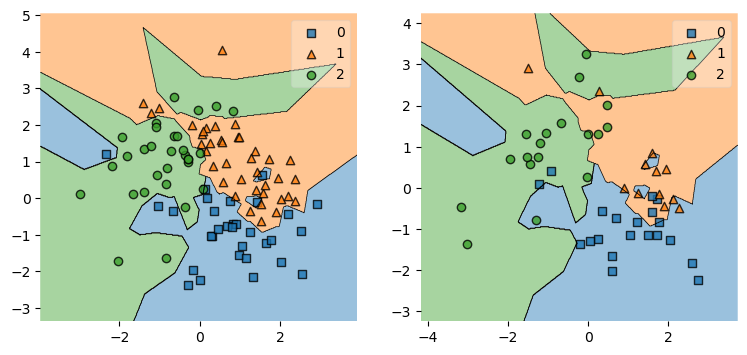

In [4]:
fig, gs = plt.figure(figsize=(9,4)), gridspec.GridSpec(1, 2)

ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])

plt.show()

#### Метод k-ближайших соседей

In [5]:
models = []
for n_neighbors in range(1, 50):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, Y_train)
    models.append(model)

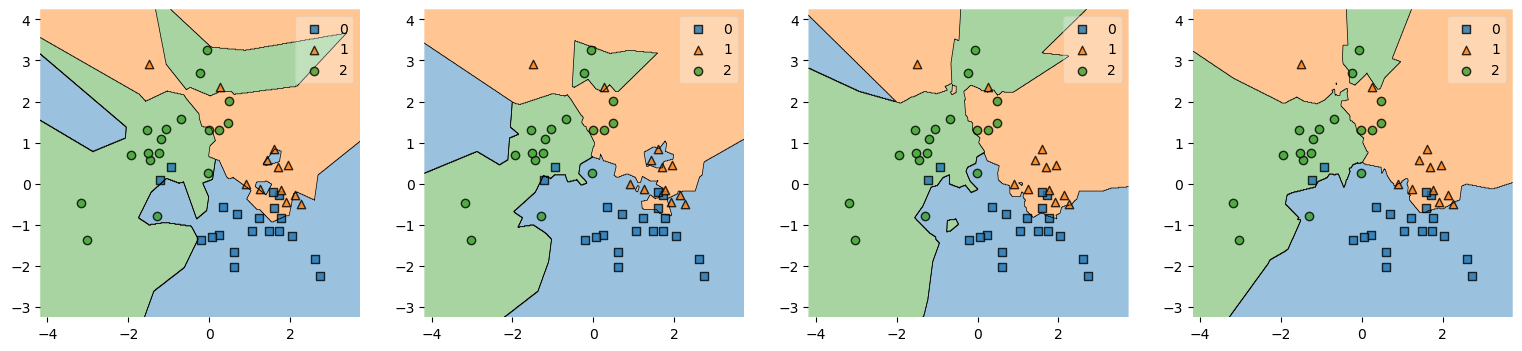

In [6]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[i], ax=ax[i])

plt.show()

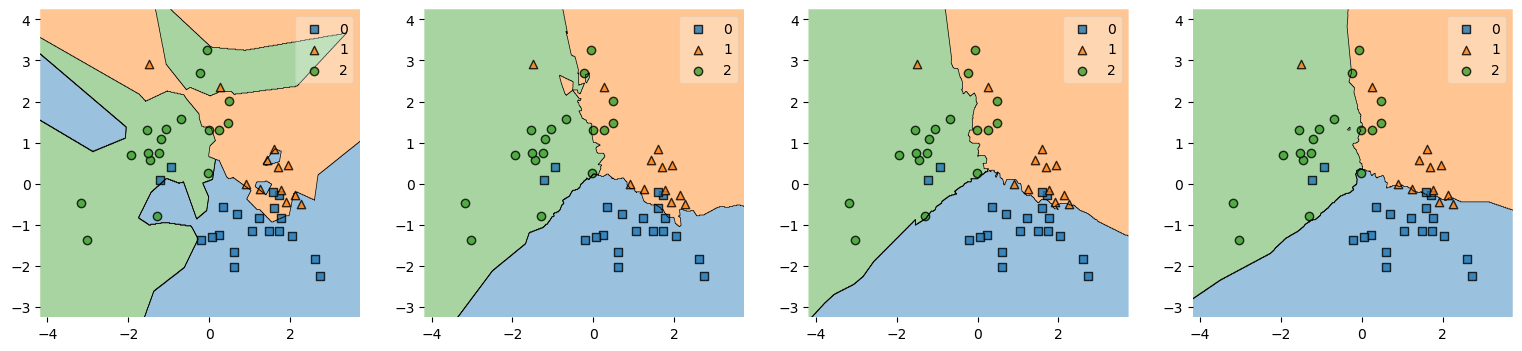

In [7]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[12*i], ax=ax[i])

plt.show()


#### Метод k-ближайших соседей с линейно убывающими весами

In [8]:
def kernel_func(distance):
    ret = np.ones_like(distance)
    k = ret.shape[1]
    for i in range(k):
        ret[:, i] *= (k-i)/k
    return ret

In [9]:
models = []
for n_neighbors in range(1, 51):
    model = KNeighborsClassifier(n_neighbors=n_neighbors,
                                 weights=kernel_func)
    model.fit(X_train, Y_train)
    models.append(model)

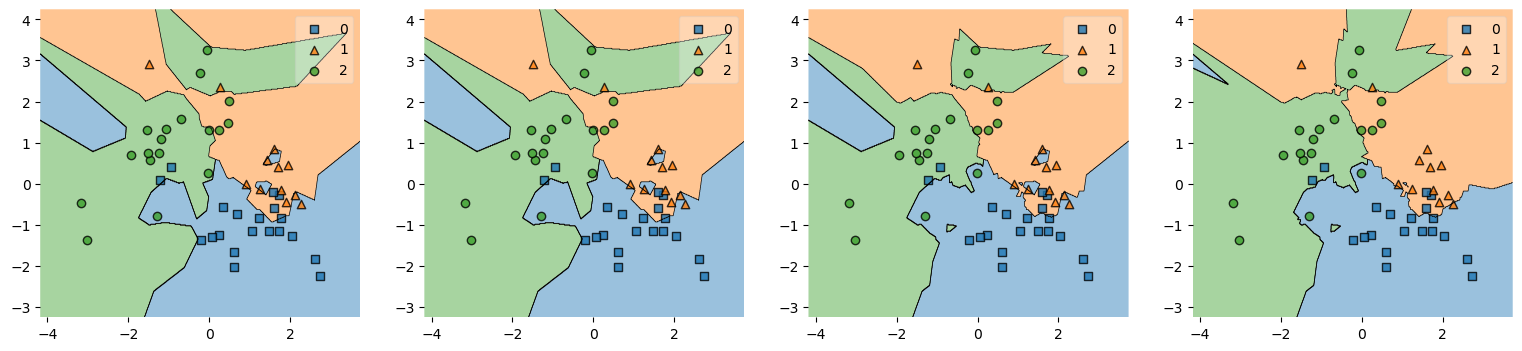

In [10]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[i], ax=ax[i])

plt.show()

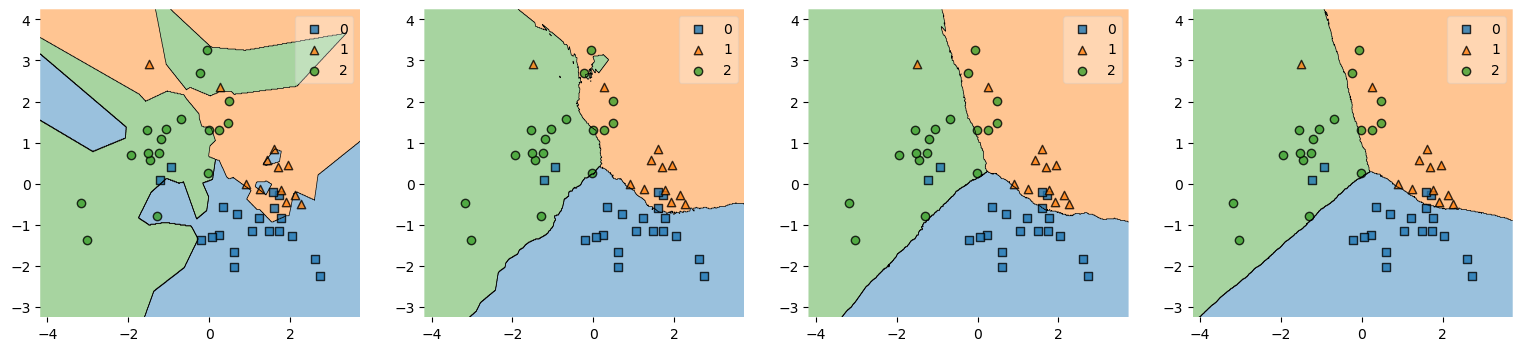

In [11]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[12*i], ax=ax[i])

plt.show()

#### Метод окна Парзена

In [12]:
def K(distance, h=0.05):
    ret = np.array(distance)/h
    return (1 - ret ** 2) * (ret <= 1)

/Users/mariamitrankova/opt/anaconda3/lib/python3.9/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


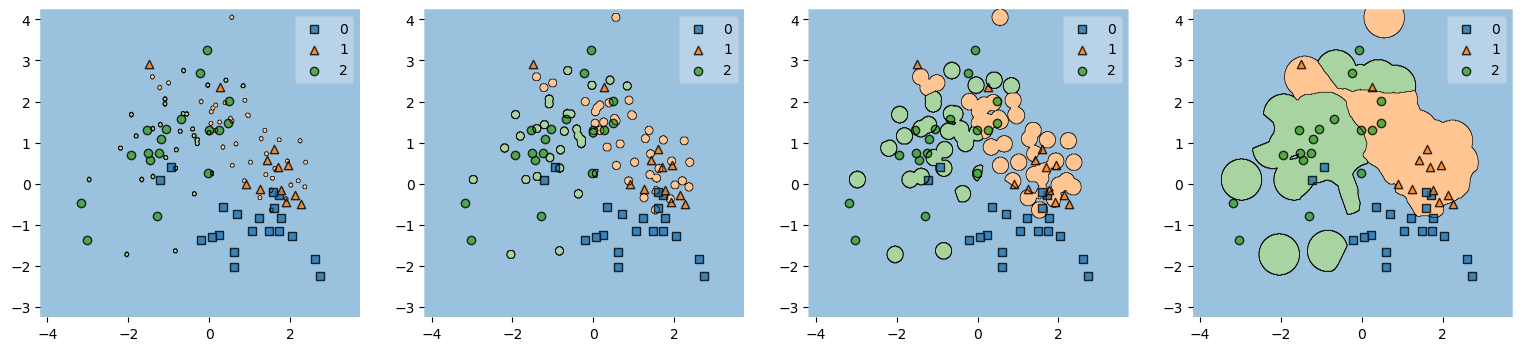

In [13]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i, h in enumerate([0.05, 0.1, 0.2, 0.5]):
    model = KNeighborsClassifier(n_neighbors=len(X_train),
                                 weights=lambda x: K(x, h=h))
    model.fit(X_train, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_test, Y_test, model, ax=ax[i])

plt.show()

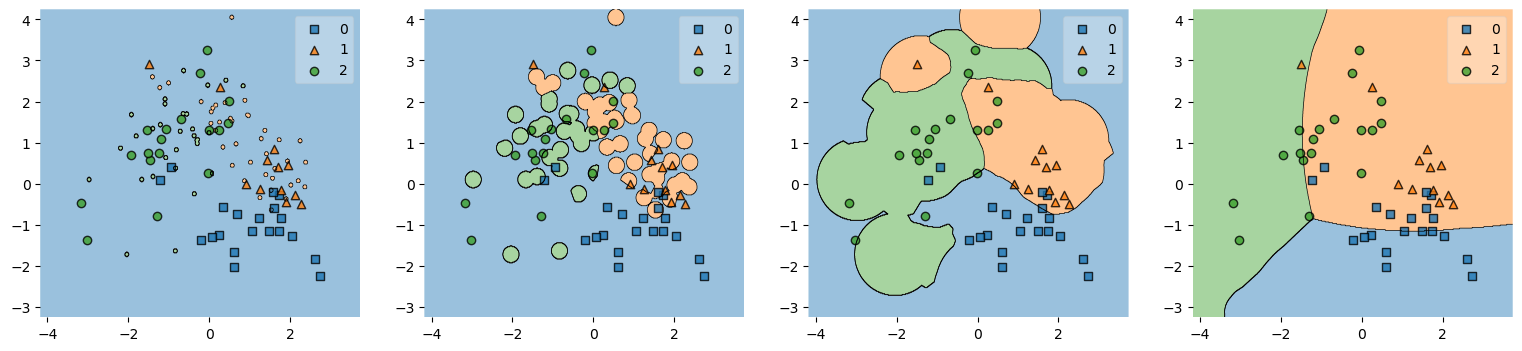

In [14]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i, h in enumerate([0.05, 0.2, 1.0, 5.0]):
    model = KNeighborsClassifier(n_neighbors=len(X_train),
                                 weights=lambda x: K(x, h=h))
    model.fit(X_train, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_test, Y_test, model, ax=ax[i])

plt.show()